In [178]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime
import calendar
import matplotlib.pyplot as plt
% matplotlib inline

# 1. In each month, what were the gross billings and net revenue?

In [179]:
people_person = pd.read_csv('drive-download-20180422T230536Z-001/people_person.csv')
services_service = pd.read_csv('drive-download-20180422T230536Z-001/services_service.csv')
people_person.head(2)


,id,first_name,last_name,email,channel,date_joined,photo,fee,gender
0,1,Meaghan,Lapete,meaghan.lapete820@aol.com,NaN,2015-07-12 15:13:16.673652,https://placekitten.com/360/208,0.0,f
1,2,Aracelis,Luhr,aracelis.luhr844@rover.com,NaN,2015-07-12 13:44:21.949482,https://placekitten.com/392/227,0.0,f


In [180]:
services_service.head(2)

,id,service_type,cancellation_policy,can_provide_oral_medication,can_provide_injected_medication,senior_dog_experience,special_needs_experience,takes_small_dogs,takes_medium_dogs,takes_large_dogs,takes_puppies,max_dogs,provider_id,fee,price,added
0,77127,boarding,strict,1,0,1,1,0,1,0,0,2,1,0.15,35,2015-07-12 15:13:16.673652
1,77128,boarding,strict,1,0,1,0,1,0,0,1,2,2,0.15,35,2015-07-12 13:44:21.949482


In [181]:
# An SQL Query might work better here to concatenate both tables, need date, fees and costs. 

In [182]:
# SQL Query
'''
SELECT a.fee AS owner_fee, b.added AS join_date, b.fee AS service_fee, b.price
FROM services_service b
JOIN people_person a
ON b.provider_id = a.id;
'''

'\nSELECT a.fee AS owner_fee, b.added AS join_date, b.fee AS service_fee, b.price\nFROM services_service b\nJOIN people_person a\nON b.provider_id = a.id;\n'

In [183]:
fees_costs = pd.read_csv('fees_costs.csv')
fees_costs.head()

,owner_fee,join_date,service_fee,price
0,0.0,2015-07-12 15:13:16.673652,0.15,35
1,0.0,2015-07-12 13:44:21.949482,0.15,35
2,0.0,2015-07-12 11:36:06.992714,0.15,24
3,0.0,2015-07-12 12:23:43.627071,0.15,24
4,0.0,2015-07-12 07:40:36.724086,0.15,34


In [184]:
fees_costs['join_date'] = pd.to_datetime(fees_costs['join_date'])

In [185]:
fees_costs['join_year'] = fees_costs['join_date'].dt.year
fees_costs['join_month'] = fees_costs['join_date'].dt.month
fees_costs['join_day'] = fees_costs['join_date'].dt.day
fees_costs['join_date'] = fees_costs['join_date'].dt.date #gets rid of time stamp

In [186]:
fees_costs.head()

,owner_fee,join_date,service_fee,price,join_year,join_month,join_day
0,0.0,2015-07-12,0.15,35,2015,7,12
1,0.0,2015-07-12,0.15,35,2015,7,12
2,0.0,2015-07-12,0.15,24,2015,7,12
3,0.0,2015-07-12,0.15,24,2015,7,12
4,0.0,2015-07-12,0.15,34,2015,7,12


Gross Billings = Booking Total (price) + Fee (owner_fee x price)

In [187]:
fees_costs['gross_billings'] = fees_costs['price'] + (fees_costs['owner_fee'] * fees_costs['price'])
fees_costs.sample(5)

,owner_fee,join_date,service_fee,price,join_year,join_month,join_day,gross_billings
3958,0.05,2016-08-19,0.20,25,2016,8,19,26.25
5355,0.07,2017-05-10,0.20,28,2017,5,10,29.96
20213,0.05,2016-03-20,0.15,38,2016,3,20,39.90
2153,0.07,2017-05-07,0.20,27,2017,5,7,28.89
2136,0.07,2017-01-14,0.20,19,2017,1,14,20.33


Net Revenue (for the company)  = (price x service_fee) + (price x owner_fee)

In [188]:
fees_costs['company_revenue'] = (fees_costs['owner_fee'] * fees_costs['price']) + (fees_costs['service_fee'] * fees_costs['price'])
fees_costs.sample(5)

,owner_fee,join_date,service_fee,price,join_year,join_month,join_day,gross_billings,company_revenue
6047,0.07,2017-06-11,0.20,25,2017,6,11,26.75,6.75
4919,0.05,2016-09-27,0.20,31,2016,9,27,32.55,7.75
17054,0.05,2016-07-02,0.20,27,2016,7,2,28.35,6.75
7442,0.07,2017-05-11,0.20,25,2017,5,11,26.75,6.75
1761,0.05,2016-04-02,0.15,28,2016,4,2,29.40,5.60


Need to sum by month and then sort since we have only been working off the indexes.

In [189]:
monthly_billing_revenue = fees_costs.groupby(['join_date'], as_index=False).sum()

In [190]:
monthly_billing_revenue.sort_values(['join_year', 'join_month']).head()

,join_date,owner_fee,service_fee,price,join_year,join_month,join_day,gross_billings,company_revenue
3,2015-07-24,0.02,0.15,30,2015,7,24,30.60,5.10
5,2015-07-28,0.02,0.15,30,2015,7,28,30.60,5.10
9,2015-08-02,0.02,0.15,30,2015,8,2,30.60,5.10
19,2015-08-14,0.02,0.15,30,2015,8,14,30.60,5.10
33,2015-08-30,0.02,0.15,36,2015,8,30,36.72,6.12


In [191]:
monthly_billing_revenue = fees_costs.groupby(['join_month', 'join_year'], as_index=False).sum()

In [192]:
monthly_billing_revenue = monthly_billing_revenue.sort_values(['join_year','join_month'])
monthly_billing_revenue.head()

,join_month,join_year,owner_fee,service_fee,price,join_day,gross_billings,company_revenue
12,7,2015,0.32,27.90,5169,2445,5178.18,784.53
15,8,2015,2.10,15.75,2894,1694,2951.88,491.98
17,9,2015,3.08,23.10,4286,2291,4371.72,728.62
19,10,2015,4.72,35.40,6458,3980,6587.16,1097.86
21,11,2015,6.20,46.50,8668,4523,8841.36,1473.56


In [193]:
monthly_billing_revenue['provider_revenue'] = monthly_billing_revenue['gross_billings'] - monthly_billing_revenue['company_revenue']
monthly_billing_revenue.head()

,join_month,join_year,owner_fee,service_fee,price,join_day,gross_billings,company_revenue,provider_revenue
12,7,2015,0.32,27.90,5169,2445,5178.18,784.53,4393.65
15,8,2015,2.10,15.75,2894,1694,2951.88,491.98,2459.90
17,9,2015,3.08,23.10,4286,2291,4371.72,728.62,3643.10
19,10,2015,4.72,35.40,6458,3980,6587.16,1097.86,5489.30
21,11,2015,6.20,46.50,8668,4523,8841.36,1473.56,7367.80


In [194]:
# plt.plot(monthly_billing_revenue['company_revenue'])
# plt.plot(monthly_billing_revenue['gross_billings'])
# plt.plot(monthly_billing_revenue['provider_revenue'])
# plt.legend();

# 2. Define take rate to be the percentage of gross billings that is net revenue. In each month, what was the aggregate take rate?

Take Rate = company_revenue / gross_billings

In [195]:
monthly_billing_revenue['take_rate'] = monthly_billing_revenue['company_revenue'] / monthly_billing_revenue['gross_billings'] * 100
monthly_billing_revenue.head()

,join_month,join_year,owner_fee,service_fee,price,join_day,gross_billings,company_revenue,provider_revenue,take_rate
12,7,2015,0.32,27.90,5169,2445,5178.18,784.53,4393.65,15.150690
15,8,2015,2.10,15.75,2894,1694,2951.88,491.98,2459.90,16.666667
17,9,2015,3.08,23.10,4286,2291,4371.72,728.62,3643.10,16.666667
19,10,2015,4.72,35.40,6458,3980,6587.16,1097.86,5489.30,16.666667
21,11,2015,6.20,46.50,8668,4523,8841.36,1473.56,7367.80,16.666667


In [196]:
monthly_billing_revenue['join_month'] = monthly_billing_revenue['join_month'].apply(lambda month: calendar.month_abbr[month])
monthly_billing_revenue.head()

,join_month,join_year,owner_fee,service_fee,price,join_day,gross_billings,company_revenue,provider_revenue,take_rate
12,Jul,2015,0.32,27.90,5169,2445,5178.18,784.53,4393.65,15.150690
15,Aug,2015,2.10,15.75,2894,1694,2951.88,491.98,2459.90,16.666667
17,Sep,2015,3.08,23.10,4286,2291,4371.72,728.62,3643.10,16.666667
19,Oct,2015,4.72,35.40,6458,3980,6587.16,1097.86,5489.30,16.666667
21,Nov,2015,6.20,46.50,8668,4523,8841.36,1473.56,7367.80,16.666667


In [197]:
monthly_billing_revenue_2015 = monthly_billing_revenue[monthly_billing_revenue.join_year == 2015]
monthly_billing_revenue_2015.head()

,join_month,join_year,owner_fee,service_fee,price,join_day,gross_billings,company_revenue,provider_revenue,take_rate
12,Jul,2015,0.32,27.90,5169,2445,5178.18,784.53,4393.65,15.150690
15,Aug,2015,2.10,15.75,2894,1694,2951.88,491.98,2459.90,16.666667
17,Sep,2015,3.08,23.10,4286,2291,4371.72,728.62,3643.10,16.666667
19,Oct,2015,4.72,35.40,6458,3980,6587.16,1097.86,5489.30,16.666667
21,Nov,2015,6.20,46.50,8668,4523,8841.36,1473.56,7367.80,16.666667


In [198]:
monthly_billing_revenue_2015 = monthly_billing_revenue_2015.drop(['owner_fee', 'service_fee','price',\
                                                                 'join_day'],axis=1)
monthly_billing_revenue_2015.head()

,join_month,join_year,gross_billings,company_revenue,provider_revenue,take_rate
12,Jul,2015,5178.18,784.53,4393.65,15.150690
15,Aug,2015,2951.88,491.98,2459.90,16.666667
17,Sep,2015,4371.72,728.62,3643.10,16.666667
19,Oct,2015,6587.16,1097.86,5489.30,16.666667
21,Nov,2015,8841.36,1473.56,7367.80,16.666667


In [199]:
monthly_billing_revenue_2015 = monthly_billing_revenue_2015.rename(columns={'join_month': 'Month', 'join_year': 'Year','gross_billings': 'Billings', 'company_revenue': 'Revenue','provider_revenue': 'Provider Revenue', 'take_rate': 'Take Rate %'})

monthly_billing_revenue_2015.head()

,Month,Year,Billings,Revenue,Provider Revenue,Take Rate %
12,Jul,2015,5178.18,784.53,4393.65,15.150690
15,Aug,2015,2951.88,491.98,2459.90,16.666667
17,Sep,2015,4371.72,728.62,3643.10,16.666667
19,Oct,2015,6587.16,1097.86,5489.30,16.666667
21,Nov,2015,8841.36,1473.56,7367.80,16.666667


In [200]:
monthly_billing_revenue_2016 = monthly_billing_revenue[monthly_billing_revenue.join_year == 2016].copy()
monthly_billing_revenue_2016.head()

,join_month,join_year,owner_fee,service_fee,price,join_day,gross_billings,company_revenue,provider_revenue,take_rate
0,Jan,2016,24.50,73.50,13726,7912,14412.30,2745.20,11667.10,19.047619
2,Feb,2016,27.65,82.95,15342,8516,16109.10,3068.40,13040.70,19.047619
4,Mar,2016,34.10,102.30,19129,11101,20085.45,3825.80,16259.65,19.047619
6,Apr,2016,34.90,107.85,19441,12095,20413.05,3973.25,16439.80,19.464264
8,May,2016,39.60,158.40,22144,13279,23251.20,5536.00,17715.20,23.809524


In [201]:
monthly_billing_revenue_2016 = monthly_billing_revenue_2016.drop(['owner_fee', 'service_fee','price',\
                                                                'join_day'],axis=1)
monthly_billing_revenue_2016.head(12)

,join_month,join_year,gross_billings,company_revenue,provider_revenue,take_rate
0,Jan,2016,14412.30,2745.20,11667.10,19.047619
2,Feb,2016,16109.10,3068.40,13040.70,19.047619
4,Mar,2016,20085.45,3825.80,16259.65,19.047619
6,Apr,2016,20413.05,3973.25,16439.80,19.464264
8,May,2016,23251.20,5536.00,17715.20,23.809524
10,Jun,2016,25019.40,5957.00,19062.40,23.809524
13,Jul,2016,26260.50,6252.50,20008.00,23.809524
16,Aug,2016,28064.40,6682.00,21382.40,23.809524
18,Sep,2016,34102.95,8119.75,25983.20,23.809524
20,Oct,2016,31594.50,7522.50,24072.00,23.809524


In [202]:
monthly_billing_revenue_2016 = monthly_billing_revenue_2016.rename(columns={'join_month': 'Month', 'join_year': 'Year','gross_billings': 'Billings', 'company_revenue': 'Revenue','provider_revenue': 'Provider Revenue', 'take_rate': 'Take Rate %'})

monthly_billing_revenue_2016.head(12)

,Month,Year,Billings,Revenue,Provider Revenue,Take Rate %
0,Jan,2016,14412.30,2745.20,11667.10,19.047619
2,Feb,2016,16109.10,3068.40,13040.70,19.047619
4,Mar,2016,20085.45,3825.80,16259.65,19.047619
6,Apr,2016,20413.05,3973.25,16439.80,19.464264
8,May,2016,23251.20,5536.00,17715.20,23.809524
10,Jun,2016,25019.40,5957.00,19062.40,23.809524
13,Jul,2016,26260.50,6252.50,20008.00,23.809524
16,Aug,2016,28064.40,6682.00,21382.40,23.809524
18,Sep,2016,34102.95,8119.75,25983.20,23.809524
20,Oct,2016,31594.50,7522.50,24072.00,23.809524


In [203]:
monthly_billing_revenue_2017 = monthly_billing_revenue[monthly_billing_revenue.join_year == 2017].copy()
monthly_billing_revenue_2017.head()

,join_month,join_year,owner_fee,service_fee,price,join_day,gross_billings,company_revenue,provider_revenue,take_rate
1,Jan,2017,95.69,273.4,38043,22310,40706.01,10271.61,30434.4,25.233645
3,Feb,2017,84.21,240.6,33439,16805,35779.73,9028.53,26751.2,25.233645
5,Mar,2017,105.28,300.8,42069,24046,45013.83,11358.63,33655.2,25.233645
7,Apr,2017,111.93,319.8,44612,25011,47734.84,12045.24,35689.6,25.233645
9,May,2017,120.12,343.2,47654,27187,50989.78,12866.58,38123.2,25.233645


In [204]:
monthly_billing_revenue_2017 = monthly_billing_revenue_2017.drop(['owner_fee', 'service_fee','price',\
                                                                 'join_day'],axis=1)
monthly_billing_revenue_2017.head()

,join_month,join_year,gross_billings,company_revenue,provider_revenue,take_rate
1,Jan,2017,40706.01,10271.61,30434.4,25.233645
3,Feb,2017,35779.73,9028.53,26751.2,25.233645
5,Mar,2017,45013.83,11358.63,33655.2,25.233645
7,Apr,2017,47734.84,12045.24,35689.6,25.233645
9,May,2017,50989.78,12866.58,38123.2,25.233645


In [205]:
monthly_billing_revenue_2017 = monthly_billing_revenue_2017.rename(columns={'join_month': 'Month', 'join_year': 'Year','gross_billings': 'Billings', 'company_revenue': 'Revenue','provider_revenue': 'Provider Revenue', 'take_rate': 'Take Rate %'})

monthly_billing_revenue_2017.head(12)

,Month,Year,Billings,Revenue,Provider Revenue,Take Rate %
1,Jan,2017,40706.01,10271.61,30434.4,25.233645
3,Feb,2017,35779.73,9028.53,26751.2,25.233645
5,Mar,2017,45013.83,11358.63,33655.2,25.233645
7,Apr,2017,47734.84,12045.24,35689.6,25.233645
9,May,2017,50989.78,12866.58,38123.2,25.233645
11,Jun,2017,47829.00,12069.00,35760.0,25.233645
14,Jul,2017,17042.96,4300.56,12742.4,25.233645


# 3. Did take rate trend up or trend down or remain unchanged over time?

Will need to plot the take rate over the course of the active months / years.

In [206]:
monthly_billing_revenue.head()

,join_month,join_year,owner_fee,service_fee,price,join_day,gross_billings,company_revenue,provider_revenue,take_rate
12,Jul,2015,0.32,27.90,5169,2445,5178.18,784.53,4393.65,15.150690
15,Aug,2015,2.10,15.75,2894,1694,2951.88,491.98,2459.90,16.666667
17,Sep,2015,3.08,23.10,4286,2291,4371.72,728.62,3643.10,16.666667
19,Oct,2015,4.72,35.40,6458,3980,6587.16,1097.86,5489.30,16.666667
21,Nov,2015,6.20,46.50,8668,4523,8841.36,1473.56,7367.80,16.666667


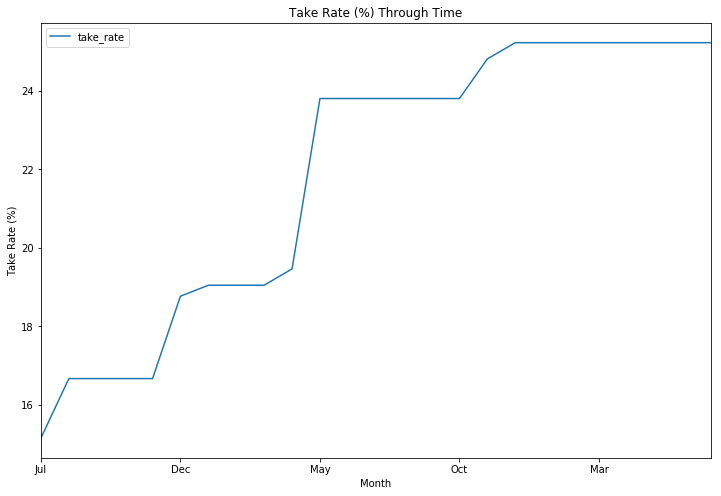

In [207]:
monthly_billing_revenue.plot(x='join_month', y='take_rate', figsize=(12,8))
plt.title('Take Rate (%) Through Time')
plt.xlabel('Month')
plt.ylabel('Take Rate (%)');

The percent change between our first 2015 take rate observation of 15.15% shows a decent improvement of 66% to the current take rate of 25.23%

=(25.233645−15.15069) / |15.15069| ×100
=10.082955 / 15.15069 × 100
=0.665511 × 100
=66.5511 %change
=66.5511 %increase



Rate of change seems to go in fits and starts, this could be due to holidays initially and then sort of just tapers off. 

# 4. If it did change, investigate why and provide an explaination.

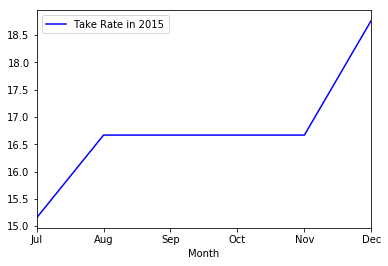

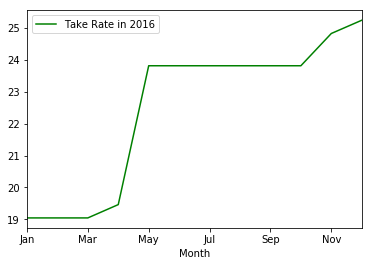

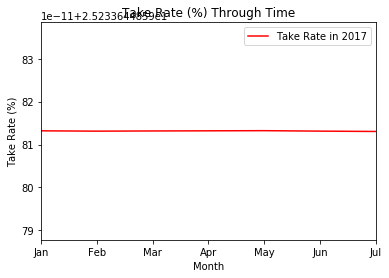

In [218]:
monthly_billing_revenue_2015.plot(x='Month', y='Take Rate %',color='b',label = 'Take Rate in 2015', figsize=(6,4))
monthly_billing_revenue_2016.plot(x='Month', y='Take Rate %',color='g',label = 'Take Rate in 2016', figsize=(6,4))
monthly_billing_revenue_2017.plot(x='Month', y='Take Rate %',color='r',label = 'Take Rate in 2017', figsize=(6,4))
plt.title('Take Rate (%) Through Time')
plt.xlabel('Month')
plt.ylabel('Take Rate (%)')
plt.legend();

# Additional Analysis 


Take rate has definitely changed over time; albeit it has come in fits ands starts. Take rate in 2015 and 2016 showed promising trends by ending the year up from where it started. 2017 has yet to show any real change as the take rate has stayed constant. 

I would like to dive more into this. Are there fewer bookings being offset by higher caliber sitters, vice versa or something else entirely. I would specifically like to see what happened in the March 2016 to May 2016 time frame since it represents the largest single month jump. 

If we could recreate this at all I would definitely like to do this. 